# **NAME-KOUSHIK LAYEK**
#**STUDENT ID-SC23M007**

# **(2)Check whether the email containing the sentence ”Good, nice, little stars.” is spam or ham**

In [ ]:
#The given training data
docs = ["Good to see you. Good day.",
        "See the sky. See the little stars.",
        "Nice picture. Nice, nice, frame.",
        "See you. Good day."]
classes = ["spam", "ham", "ham", "spam"]

#create a vocabulary
vocab=set()
for doc in docs:
  for word in doc.split():
    vocab.add(word)
vocb=list(vocab)

#calculates the class_probability of each class
class_probs={c:classes.count(c)/len(classes) for c in set(classes)}

#calculate the cond probability for each word of docs
cond_probs={}
for c in class_probs.keys():
  cond_probs[c]={}
  for word in vocab:
    cond_probs[c][word]=sum([doc.count(word) for doc,doc_class in zip(docs,classes) if doc_class==c])+1/(sum([len(doc.split()) for doc,doc_class in zip(docs,classes) if doc_class==c] )+len(vocb))

    #print(cond_probs[c][word])
#define the testing document
test_doc="Good,nice,little stars"

#calculate the scores for each class
scores={}
for c in class_probs.keys():
  scores[c]=class_probs[c]
  for word in test_doc.split():
    if word in cond_probs[c]:
      scores[c]*=cond_probs[c][word]


# Print the class with the highest score
print('The given Email is in', max(scores, key=scores.get))




The given Email is in spam


# **(3)Analyze Data 4 sing Naive Bayes.**

**(a)Describe the procedure you used for the analysis.**

In [ ]:
#ttps://www.python-engineer.com/courses/mlfromscratch/05_naivebayes/

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/data5.csv')
# Seperating X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])


total_rows=len(X)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)

In [ ]:
import numpy as np

def fit_naive_bayes(X, y):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)

    # Initilization of  mean, var, and prior for each class
    mean = np.zeros((n_classes, n_features),dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    priors = np.zeros(n_classes, dtype=np.float64)

    for idx, c in enumerate(classes):
        X_c = X[y == c]
        mean[idx, :] = X_c.mean(axis=0)
        var[idx, :] = X_c.var(axis=0)
        priors[idx] = X_c.shape[0] / float(n_samples)

    return mean, var, priors, classes

def predict_naive_bayes(X, mean, var, priors, classes):
    y_pred = [_predict_naive_bayes(x, mean, var, priors, classes) for x in X]
    return np.array(y_pred)

def _predict_naive_bayes(x, mean, var, priors, classes):
    posteriors = []

    # Calculate posterior probability for each class
    for idx, c in enumerate(classes):
        prior = np.log(priors[idx])
        posterior = np.sum(np.log(_pdf_naive_bayes(idx, x, mean, var)))
        posterior = prior + posterior
        posteriors.append(posterior)


    return classes[np.argmax(posteriors)]

def _pdf_naive_bayes(class_idx, x, mean, var):
    numerator = np.exp(- (x - mean[class_idx])**2 / (2 * var[class_idx]))
    denominator = np.sqrt(2 * np.pi * var[class_idx])
    return numerator / denominator

# Assuming X2_train, Y2_train, X2_test, and Y2_test are your training and testing sets
mean, var, priors, classes = fit_naive_bayes(X2_train, Y2_train)

# Make predictions on the testing set
predictions = predict_naive_bayes(X2_test, mean, var, priors, classes)

print(predictions)


[-1 -1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1
  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1  1]


**(b)PERFORMANCE MEASURE**

In [ ]:
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y2_test)):
  if(predictions[i]==Y2_test[i]==1):
    TP+=1
  elif(predictions[i]==Y2_test[i]==-1):
    TN+=1
  elif(predictions[i]==1 and Y2_test[i]==-1):
    FN+=1
  elif(predictions[i]==-1 and Y2_test[i]== 1):
    FP+=1
print('True_positive=',TP)
print('True_negative=',TN)
print('False_negative=',FN)
print('False_positive=',FP)


#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)


True_positive= 22
True_negative= 19
False_negative= 2
False_positive= 1
Accuracy of the model is= 0.9318181818181818
sensitivity of the model is= 0.9166666666666666
specificaty of the model is= 0.95
precision of the model is=  0.9565217391304348
F_measure of the model is= 0.9361702127659574


# **(4)Apply Multinomial Naive Bayes on Data 6.**

In [ ]:

import numpy as np
import pandas as pd
df=pd.read_csv('/content/data6.csv')
# Seperating X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])


total_rows=len(X)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.shape(X2_train)

(165, 3)

In [ ]:
import numpy as np

def fit_naive_bayes(X, y):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)

    # Initilization of  mean, var, and prior for each class
    mean = np.zeros((n_classes, n_features),dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    priors = np.zeros(n_classes, dtype=np.float64)

    for idx, c in enumerate(classes):
        X_c = X[y == c]
        mean[idx, :] = X_c.mean(axis=0)
        var[idx, :] = X_c.var(axis=0)
        priors[idx] = X_c.shape[0] / float(n_samples)

    return mean, var, priors, classes

def predict_naive_bayes(X, mean, var, priors, classes):
    y_pred = [_predict_naive_bayes(x, mean, var, priors, classes) for x in X]
    return np.array(y_pred)

def _predict_naive_bayes(x, mean, var, priors, classes):
    posteriors = []

    # Calculate posterior probability for each class
    for idx, c in enumerate(classes):
        prior = np.log(priors[idx])
        posterior = np.sum(np.log(_pdf_naive_bayes(idx, x, mean, var)))
        posterior = prior + posterior
        posteriors.append(posterior)


    return classes[np.argmax(posteriors)]

def _pdf_naive_bayes(class_idx, x, mean, var):
    numerator = np.exp(- (x - mean[class_idx])**2 / (2 * var[class_idx]))
    denominator = np.sqrt(2 * np.pi * var[class_idx])
    return numerator / denominator

# Assuming X2_train, Y2_train, X2_test, and Y2_test are your training and testing sets
mean, var, priors, classes = fit_naive_bayes(X2_train, Y2_train)

# Make predictions on the testing set
predictions = predict_naive_bayes(X2_test, mean, var, priors, classes)

print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1]


**Report the parameter**

In [ ]:
print('mean=',mean)
print('priors=',priors)
print('variance=',var)

mean= [[20.         12.68055556 17.31944444]
 [13.66666667 19.74193548 16.59139785]]
priors= [0.43636364 0.56363636]
variance= [[10.97222222  8.41184414 24.63406636]
 [11.8781362  11.09469303 23.03734536]]


**Decession Boundary(The region where the colors transition represents the decision boundary between different classes.)**

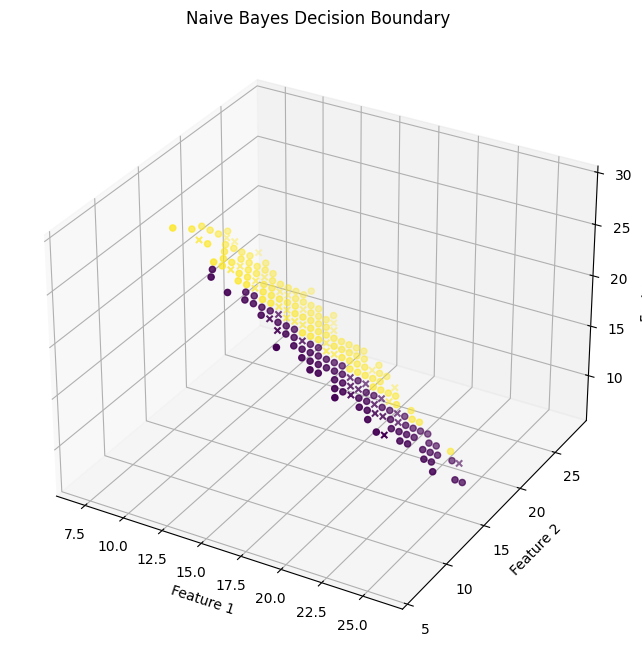

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X2_train has three features (shape=(165, 3))
# You may need to adjust the indices based on your actual feature names or order
feature1 = X2_train[:, 0]
feature2 = X2_train[:, 1]
feature3 = X2_train[:, 2]

# Create a meshgrid for 3D plot
x_min, x_max = feature1.min() - 1, feature1.max() + 1
y_min, y_max = feature2.min() - 1, feature2.max() + 1
z_min, z_max = feature3.min() - 1, feature3.max() + 1

xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Flatten the meshgrid and make predictions for each point
meshgrid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
meshgrid_predictions = predict_naive_bayes(meshgrid_points, mean, var, priors, classes)

# Reshape predictions to the shape of the meshgrid
meshgrid_predictions = meshgrid_predictions.reshape(xx.shape)

# Plot the 3D decision boundary
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(feature1, feature2, feature3, c=Y2_train, marker='o', label='Training Data')
ax.scatter(X2_test[:, 0], X2_test[:, 1], X2_test[:, 2], c=predictions, marker='x', label='Test Predictions')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Naive Bayes Decision Boundary')

plt.show()


**Report The Performance Measured**

In [ ]:
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y2_test)):
  if(predictions[i]==Y2_test[i]==1):
    TP+=1
  elif(predictions[i]==Y2_test[i]==0):
    TN+=1
  elif(predictions[i]==1 and Y2_test[i]==0):
    FN+=1
  elif(predictions[i]==-1 and Y2_test[i]==0):
    FP+=1
print('True_positive=',TP)
print('False_positive=',FP)
print('True_negative=',TN)
print('False_negative=',FN)


#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)

print('Accuracy of the model is=',Accuracy)

True_positive= 25
False_positive= 0
True_negative= 15
False_negative= 0
Accuracy of the model is= 1.0


# **In Another Approach**

In [ ]:
def fit_multinomial_naive_bayes(x,y):
  n_samples,n_features = X.shape
  classes=np.unique(y)
  n_classes=len(classes)

  #calculate the class prior probabilities
  pi_c=np.log([np.sum(y==c)/n_samples for c in classes])

  #calculate feature probability for each class
  word_counts_per_class= np.array([np.sum(x[y==c],axis=0) for c in classes])+1
  pj_c=np.log(word_counts_per_class/(np.sum(word_counts_per_class,axis=1,keepdims=True)+n_features))

  return pi_c,pj_c


def predict_multinomial_naive_bayes(x,pi_c,pj_c):
  l_hat=x @ pj_c.T+pi_c
  predicted_classes=np.argmax(l_hat,axis=1)

  return predicted_classes

pi_c,pj_c=fit_multinomial_naive_bayes(X2_train,Y2_train)

predicted_class=predict_multinomial_naive_bayes(X2_test,pi_c,pj_c)



In [ ]:
predicted_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

# **4(b)Report the parameters of the model**

In [ ]:
print('class prior probabilities=',pi_c)
print('Feature Probability Matrix=',pj_c)

class prior probabilities= [-1.05605267 -0.8001193 ]
Feature Probability Matrix= [[-0.91726181 -1.37252383 -1.06105685]
 [-1.29756625 -0.9300229  -1.10378026]]


# **(4)( a )Decision Boundary-log(πc​∏j​(pjc​)xj​)=logπc​+∑j=1n​xj​logpjc​=w0​+wcT​x**

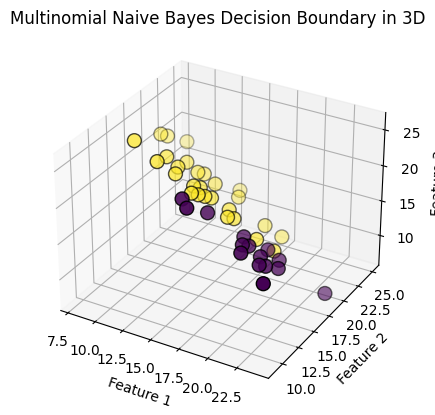

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have trained your model and obtained pi_c and pj_c

# Generate a grid of points
x_min, x_max = X2_test[:, 0].min() - 1, X2_test[:, 0].max() + 1
y_min, y_max = X2_test[:, 1].min() - 1, X2_test[:, 1].max() + 1
z_min, z_max = X2_test[:, 2].min() - 1, X2_test[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1), np.arange(z_min, z_max, 0.1))

# Flatten the grid and predict the class for each point
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
predicted_classes = predict_multinomial_naive_bayes(grid_points, pi_c, pj_c)

# Reshape the predictions to match the shape of the meshgrid
decision_surface = predicted_classes.reshape(xx.shape)




# Plot the decision boundary in a 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2_test[:, 0], X2_test[:, 1], X2_test[:, 2], c=Y2_test, marker='o', s=100, edgecolors='k')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

# Flatten the meshgrid for plotting
xx_flat = xx.ravel()
yy_flat = yy.ravel()
zz_flat = zz.ravel()

# Plot the decision boundary surface
#ax.plot_trisurf(xx_flat, yy_flat, zz_flat, cmap=plt.cm.bwr, linewidth=0.2, alpha=0.5)

plt.title("Multinomial Naive Bayes Decision Boundary in 3D")
plt.show()



# **4(c)Report the performance measure used and their values**

In [ ]:
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y2_test)):
  if(predicted_class[i]==Y2_test[i]==1):
    TP+=1
  elif(predicted_class[i]==Y2_test[i]==0):
    TN+=1
  elif(predicted_class[i]==1 and Y2_test[i]==0):
    FN+=1
  elif(predicted_class[i]==-1 and Y2_test[i]==0):
    FP+=1
print('True_positive=',TP)
print('False_positive=',FP)
print('True_negative=',TN)
print('False_negative=',FN)


#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)

print('Accuracy of the model is=',Accuracy)


True_positive= 24
False_positive= 0
True_negative= 18
False_negative= 0
Accuracy of the model is= 1.0


# **Apply Naive Bayes on Ionosphere data set.**

# **4(a)(b)Apply hold out cross validation techniques and all the pre-processing techniques that used**

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/ionosphere.data')

df=df.iloc[:,2:]
# Seperating X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])
# Assuming 'b' is 0 and 'g' is 1
Y[Y == 'b'] = 0
Y[Y == 'g'] = 1

# Convert the labels to integers
Y = Y.astype(int)

total_rows=len(X)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)

In [ ]:
df

,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,0.85243.1,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,-0.06302,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [ ]:
import numpy as np

def fit_naive_bayes(X, y):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)

    # Initilization of  mean, var, and prior for each class
    mean = np.zeros((n_classes, n_features),dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    priors = np.zeros(n_classes, dtype=np.float64)

    for idx, c in enumerate(classes):
        X_c = X[y == c]
        mean[idx, :] = X_c.mean(axis=0)
        var[idx, :] = X_c.var(axis=0)
        priors[idx] = X_c.shape[0] / float(n_samples)

    return mean, var, priors, classes

def predict_naive_bayes(X, mean, var, priors, classes):
    y_pred = [_predict_naive_bayes(x, mean, var, priors, classes) for x in X]
    return np.array(y_pred)

def _predict_naive_bayes(x, mean, var, priors, classes):
    posteriors = []

    # Calculate posterior probability for each class
    for idx, c in enumerate(classes):
        prior = np.log(priors[idx])
        posterior = np.sum(np.log(_pdf_naive_bayes(idx, x, mean, var)))
        posterior = prior + posterior
        posteriors.append(posterior)


    return classes[np.argmax(posteriors)]

def _pdf_naive_bayes(class_idx, x, mean, var):
    numerator = np.exp(- (x - mean[class_idx])**2 / (2 * var[class_idx]))
    denominator = np.sqrt(2 * np.pi * var[class_idx])
    return numerator / denominator

# Assuming X2_train, Y2_train, X2_test, and Y2_test are your training and testing sets
mean, var, priors, classes = fit_naive_bayes(X2_train, Y2_train)

# Make predictions on the testing set
predictions = predict_naive_bayes(X2_test, mean, var, priors, classes)

print(predictions)

[0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1]


# **4(C)Report on the result obtain**

In [ ]:
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y2_test)):
  if(predictions[i]==Y2_test[i]==1):
    TP+=1
  elif(predictions[i]==Y2_test[i]==0):
    TN+=1
  elif(predictions[i]==1 and Y2_test[i]==0):
    FN+=1
  elif(predictions[i]==-1 and Y2_test[i]==0):
    FP+=1
print('True_positive=',TP)
print('False_positive=',FP)
print('True_negative=',TN)
print('False_negative=',FN)


#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)

print('Accuracy of the model is=',Accuracy)

True_positive= 34
False_positive= 0
True_negative= 21
False_negative= 4
Accuracy of the model is= 0.9322033898305084


# **Apply multiclass Naive Bayes on Abalone data set**

**Data preprocessing**

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/abalone.csv')
# Seperating X and Y arrays
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])


total_rows=len(X)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X[train_indices, :]
Y2_train = Y[train_indices]

# Create the testing set by excluding the training indices
X2_test = np.delete(X, train_indices, axis=0)
Y2_test = np.delete(Y, train_indices, axis=0)

**6(a)Explanation of experimental Procedure**

In [ ]:
# https://www.python-engineer.com/courses/mlfromscratch/05_naivebayes/

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def fit_naive_bayes(X, y):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)

    # calculate mean, var, and prior for each class
    mean = np.zeros((n_classes, n_features), dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    priors = np.zeros(n_classes, dtype=np.float64)

    for idx, c in enumerate(classes):
        X_c = X[y == c]
        mean[idx, :] = X_c.mean(axis=0)
        var[idx, :] = X_c.var(axis=0)
        priors[idx] = X_c.shape[0] / float(n_samples)

    return mean, var, priors, classes

def predict_naive_bayes(X, mean, var, priors, classes):
    y_pred = [_predict(x, mean, var, priors, classes) for x in X]
    return np.array(y_pred)

def _predict(x, mean, var, priors, classes):
    posteriors = []

    # calculate posterior probability for each class
    for idx, c in enumerate(classes):
        prior = np.log(priors[idx])
        posterior = np.sum(np.log(_pdf(idx, x, mean, var)))
        posterior = prior + posterior
        posteriors.append(posterior)

    # return class with highest posterior probability
    return classes[np.argmax(posteriors)]

def _pdf(class_idx, x, mean, var):
     numerator = np.exp(- (x - mean[class_idx]) ** 2 / (2 * var[class_idx]))
     denominator = np.sqrt(2 * np.pi * var[class_idx])
     return numerator / denominator

**6(b)Report the values of the Parameters**

In [ ]:
mean, var, priors, classes = fit_naive_bayes(X2_train, Y2_train)
# Print or log the values of the parameters
print("Mean:\n", mean)
print("\nVariance:\n", var)
print("\nPriors:\n", priors)

Mean:
 [[-3.948685   -3.38779487  3.17164062]
 [ 4.4187427   4.52618038 -3.00117447]
 [ 0.46212443  0.20002522 -0.04394689]]

Variance:
 [[14.93425444 15.594327    8.93557417]
 [ 8.05743312  4.82006926  4.01534913]
 [ 9.16571322  8.04154023  6.71410483]]

Priors:
 [0.33472803 0.33472803 0.33054393]


**6(c)Report on the result obtained**

In [ ]:
# Make predictions on the test set
Y_pred = predict_naive_bayes(X2_test, mean, var, priors, classes)

# Evaluate the performance
accuracy = accuracy_score(Y2_test, Y_pred)
confusion = confusion_matrix(Y2_test, Y_pred)
classification_report_str = classification_report(Y2_test, Y_pred)

# Print the results
print("\nAccuracy:", accuracy)


Accuracy: 0.85
